### Dummy code

In [2]:
import os
import cv2
import math
import time
import tarfile
import numbers
import threading
import queue as Queue
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_url
#from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, DataLoader, Dataset
from torchsummary import summary

In [3]:
x = torch.arange(2*4).view(2, 4)
x

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [4]:
y = torch.arange(2*4).reshape(2, 4)
y

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [5]:
print(x.view(2, 2, 2))

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])


In [20]:
print(x.permute(1, 0))

tensor([[0, 4],
        [1, 5],
        [2, 6],
        [3, 7]])


In [22]:
import mxnet as mx
from mxnet import recordio

#### LFW dataset - sklearn

In [23]:
from sklearn.datasets import fetch_lfw_people

In [24]:
lfw_people = fetch_lfw_people(data_home = "D:/Face/send/", color=True)

In [ ]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w, c = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 13233
n_features: 8742
n_classes: 5749


In [ ]:
X.shape,y.shape

((13233, 8742), (13233,))

In [ ]:
lfw_people.images.shape

(13233, 62, 47, 3)

Text(0.5, 1.0, 'label = 5498')

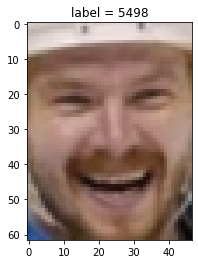

In [ ]:
idx = 2300
img1 = lfw_people.images[idx]
img1 = img1.astype(int)
label = lfw_people.target[idx]

plt.imshow(img1)
plt.title('label = ' + str(label))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

In [ ]:
X_train.shape, y_train.shape

((11909, 8742), (11909,))

In [ ]:
X_test.shape, y_test.shape

((1324, 8742), (1324,))

In [ ]:
X_train = X_train.reshape(11909, 62, 47, 3)
X_train.shape

(11909, 62, 47, 3)

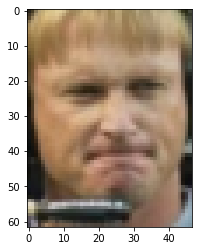

In [ ]:
t = X_train[100].astype(int)
plt.imshow(t)
plt.show()

In [ ]:
xb = np.transpose(X_train, (0, 3, 1, 2))
print(xb.shape)

(11909, 3, 62, 47)


In [ ]:
xb1 = np.transpose(xb, (0, 2, 3, 1))
print(xb1.shape)

(11909, 62, 47, 3)


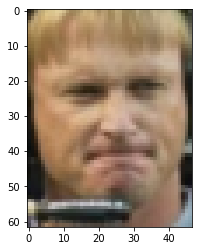

In [ ]:
t = xb1[100].astype(int)
t = t.reshape(62, 47, 3)
plt.imshow(t)
plt.show()

In [ ]:
train = torch.from_numpy(xb)
labels = torch.from_numpy(y_train)
train.shape, labels.shape

(torch.Size([11909, 3, 62, 47]), torch.Size([11909]))

In [ ]:
train = train.permute(0, 2, 3, 1)
train.shape

torch.Size([11909, 62, 47, 3])

In [ ]:
train[0].shape

torch.Size([62, 47, 3])

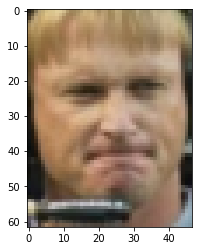

In [ ]:
t = train[100].int()
plt.imshow(t)
plt.show()

In [ ]:
a = [[2, 3, 4], [1, 2, 5]]
b = [8, 4]

c = zip(a, b)

In [ ]:
c

In [ ]:
d = []
for x, y in c:
    d.append([x, y])

In [ ]:
d

[[[2, 3, 4], 8], [[1, 2, 5], 4]]

In [ ]:
d1, d2 = d[0]
print(d1)
print(d2)

[2, 3, 4]
8


#### LFW dataset

In [ ]:
import pickle
from mxnet import ndarray as nd

In [ ]:
image_size = [112, 112]

In [ ]:
#path = "faces_emore/lfw.bin" #For Ubuntu
path = "D:/Face/faces_emore/vgg2_fp.bin" #For Windows

In [ ]:
with open(path, 'rb') as f:
            bins, issame_list = pickle.load(f, encoding='bytes')

In [ ]:
len(issame_list), issame_list[3000]

(5000, 1)

In [ ]:
issame_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
len(bins), len(issame_list)

(12000, 6000)

(112, 112, 3)
(112, 112, 3)


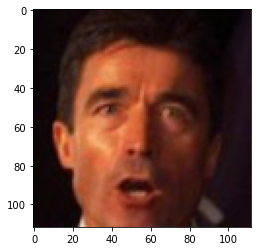

In [ ]:
t = bins[10]
t2 = mx.image.imdecode(t)
print(t2.shape)
tt = t2.asnumpy()
print(tt.shape)

plt.imshow(tt)
#plt.title('label = ' + str(label.item()))

In [ ]:
#t2

In [ ]:
#tt

In [ ]:
t3 = mx.image.resize_short(t2, 110)
t3.shape

(110, 110, 3)

In [ ]:
t4 = nd.transpose(t2, axes=(2, 0, 1))
t4.shape

(3, 112, 112)

In [ ]:
#t4

In [ ]:
a = torch.from_numpy(t4.asnumpy())
a.shape

torch.Size([3, 112, 112])

In [ ]:
a = torch.reshape(a, (112, 112, 3))
a.shape

torch.Size([112, 112, 3])

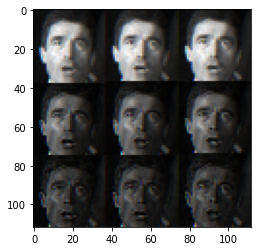

In [ ]:
plt.imshow(a)
plt.show()

In [ ]:
t5 = mx.ndarray.flip(data=t4, axis=2)
t5.shape

(3, 112, 112)

In [ ]:
b = torch.from_numpy(t5.asnumpy())
b.shape

torch.Size([3, 112, 112])

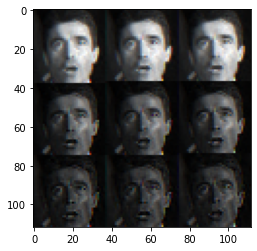

In [ ]:
b = torch.reshape(b, (112, 112, 3))
plt.imshow(b)
plt.show()

In [ ]:
data_list = []
for flip in [0, 1]:
    data = torch.empty((len(issame_list) * 2, 3, image_size[0], image_size[1]))
    print(data.shape)
    data_list.append(data)

torch.Size([12000, 3, 112, 112])
torch.Size([12000, 3, 112, 112])


In [ ]:
data_list = []
for flip in [0, 1]:
    data = torch.empty((len(issame_list) * 2, image_size[0], image_size[1], 3))
    print(data.shape)
    data_list.append(data)

torch.Size([12000, 112, 112, 3])
torch.Size([12000, 112, 112, 3])


In [ ]:
len(data_list)

2

In [ ]:
data_list[0].shape, data_list[1].shape

(torch.Size([12000, 112, 112, 3]), torch.Size([12000, 112, 112, 3]))

In [ ]:
data.shape

torch.Size([12000, 112, 112, 3])

In [ ]:
for idx in range(len(issame_list) * 2):
    _bin = bins[idx]
    img = mx.image.imdecode(_bin)
    #print(img.shape)
    img = np.transpose(img, axes=(2, 0, 1))
    for flip in [0, 1]:
        if flip == 1:
            img = mx.ndarray.flip(data=img, axis=2)
        data_list[flip][idx][:] = torch.from_numpy(img.asnumpy())
    if idx % 1000 == 0:
        print('loading bin', idx)

RuntimeError: The expanded size of the tensor (3) must match the existing size (112) at non-singleton dimension 2.  Target sizes: [112, 112, 3].  Tensor sizes: [3, 112, 112]

In [ ]:
print(data_list[1].shape)

In [ ]:
im = data_list[0][10500]
im.shape

torch.Size([112, 112, 3])

In [ ]:
im

In [ ]:
im = torch.reshape(im, (112, 112, 3))
im

In [ ]:
plt.imshow(im)
plt.show()

In [ ]:
def load_bin(path, image_size=[112, 112]):
    with open(path, 'rb') as f:
        bins, issame_list = pickle.load(f, encoding='bytes')  # py3
    data_list = torch.empty((len(issame_list) * 2, 3, image_size[0], image_size[1]))
    
    for idx in range(len(issame_list) * 2):
        _bin = bins[idx]
        img = mx.image.imdecode(_bin)
        if img.shape[1] != image_size[0]:
            img = mx.image.resize_short(img, image_size[0])
        img = np.transpose(img, axes=(2, 0, 1))
        data_list[idx][:] = torch.from_numpy(img.asnumpy())
        
        if idx % 1000 == 0:
            print('loading bin', idx)
    print(data_list.shape)
    return data_list, issame_list

In [ ]:
x, y = load_bin(path)

loading bin 0
loading bin 1000
loading bin 2000
loading bin 3000
loading bin 4000
loading bin 5000
loading bin 6000
loading bin 7000
loading bin 8000
loading bin 9000
loading bin 10000
loading bin 11000
torch.Size([12000, 3, 112, 112])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True


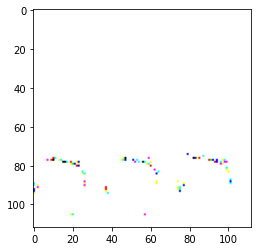

In [ ]:
img = x[120]
img = torch.reshape(img, (112, 112, 3))
print(y[120])

plt.imshow(img)
plt.show()

#### Loss Function checking

In [ ]:
k = nn.Parameter(torch.FloatTensor(3, 5))
k

In [ ]:
a = torch.Tensor([[1, 2, 3], [3, -4, -2]])
b = torch.Tensor([[1, 2, 3, 4], [3, 4, 1, 0], [5, 6, 1, 1]])

In [ ]:
a.shape, b.shape

In [ ]:
#a = torch.FloatTensor([2, 3])
#a.dtype

In [ ]:
c = torch.mm(a, b)
c.shape

In [ ]:
c

In [ ]:
c.size()

In [ ]:
e = c.clamp(-1, 1)

In [ ]:
e

In [ ]:
dirty = e > 0
dirty

In [ ]:
dirty = dirty.float()
dirty

In [ ]:
index = torch.where(c != -1)[0]
index

In [ ]:
index.size(0)

In [ ]:
index.size()[0]

In [ ]:
torch.zeros(index.size()[0], c.size()[1])

In [ ]:
def abc(a: int, logits: torch.IntTensor):
    print(a)
    print(logits)

In [ ]:
abc(5.2, c)

In [ ]:
k = [[1, 2, 3], [2, 3, 1]]
abc(5, k)

In [ ]:
k = [[1, 2, 3], [2, 3, 1]]
abc(5.2, 4)

In [ ]:
c.view(-1)

In [ ]:
#----

In [ ]:
logits = torch.Tensor([[1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0]]) #torch.Tensor([10, 2, 3, 5])
labels = torch.Tensor([[1, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 0, 1]])

index = torch.where(labels != -1)[0]
index

In [ ]:
print(logits.dtype)
print(labels.dtype)
print(index.dtype)

In [ ]:
labels[index]

In [ ]:
l = labels[index].view(-1)
l

In [ ]:
l = l.int()
l

In [ ]:
t = logits[index, index]

In [ ]:
t

#### Loss Function 1

In [ ]:
class CosFace(torch.nn.Module):
    def __init__(self, s=64.0, m=0.40):
        super(CosFace, self).__init__()
        self.s = s
        self.m = m

    def forward(self, logits, labels):
        index = torch.where(labels != -1)[0]
        target_logit = logits[index, labels[index].view(-1)]
        final_target_logit = target_logit - self.m
        logits[index, labels[index].view(-1)] = final_target_logit
        logits = logits * self.s
        return logits

In [ ]:
loss = CosFace()

In [ ]:
logits = torch.randn(3, 5)
labels = torch.empty(3, dtype=torch.long).random_(5)

In [ ]:
logits.dtype, labels.dtype

In [ ]:
output = loss(logits, labels) #input: logits, target: labels

In [ ]:
print(logits.shape, labels.shape, output.shape)

In [ ]:
print('input: ', logits, '\n target: ', labels, '\n output: ', output)

In [ ]:
index = torch.where(labels != -1)[0]
index

In [ ]:
labels[index].view(-1)

In [ ]:
target_logit = logits[index, labels[index].view(-1)]
target_logit

In [ ]:
final_target_logit = target_logit - 1
final_target_logit

In [ ]:
logits[index, labels[index].view(-1)] = final_target_logit
logits

In [ ]:
logits = logits * 100
logits

#### Loss Function 2

In [ ]:
class CosFace(nn.Module):
    def __init__(self, in_features, out_features, s=64.0, m=0.35):
        super(CosFace, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        
        self.kernel = nn.Parameter(torch.FloatTensor(in_features, out_features))
        nn.init.normal_(self.kernel, std=0.01)

    def forward(self, logits, labels):
        #logits = l2_norm(logits, axis=1)
        #kernel_norm = l2_norm(self.kernel, axis=0)
        cos_theta = torch.mm(logits, kernel)#_norm)
        cos_theta = cos_theta.clamp(-1, 1)  # for numerical stability
        index = torch.where(labels != -1)[0]
        m_hot = torch.zeros(index.size()[0], cos_theta.size()[1])
        m_hot.scatter_(1, labels[index, None], self.m)
        cos_theta[index] -= m_hot
        ret = cos_theta * self.s
        return ret

In [ ]:
torch.linalg.norm(logits, dim=1, ord = 2, keepdim=True)

In [ ]:
F.normalize(logits, p=2.0, dim=0)

In [ ]:
logits = torch.randn(128, 100)
labels = torch.empty(128, dtype=torch.long).random_(5)

In [ ]:
logits.dtype, labels.dtype

(torch.float32, torch.int64)

In [ ]:
print(logits.shape, labels.shape)#, output.shape)

torch.Size([128, 100]) torch.Size([128])


In [ ]:
print('logits: ', logits, '\n labels: ', labels)#, '\n output: ', output)

In [ ]:
in_features = 100
out_features = 500
s = 10
m = 5
        
kernel = nn.Parameter(torch.FloatTensor(in_features, out_features))

In [ ]:
kernel.shape

torch.Size([100, 500])

In [ ]:
cos_theta = torch.mm(logits, kernel)
cos_theta, cos_theta.shape

(tensor([[ 0.0000e+00,  0.0000e+00, -6.7965e-20,  ...,  0.0000e+00,
          -6.3199e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -8.2432e-20,  ...,  0.0000e+00,
           3.1809e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -1.5335e-19,  ...,  0.0000e+00,
           8.5059e-43,  0.0000e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00, -1.2393e-20,  ...,  0.0000e+00,
          -6.0676e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -7.1846e-20,  ...,  0.0000e+00,
          -3.0688e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  6.8737e-20,  ...,  0.0000e+00,
           3.4332e-43,  0.0000e+00]], grad_fn=<MmBackward0>),
 torch.Size([128, 500]))

In [ ]:
cos_theta = cos_theta.clamp(-1, 1)  # for numerical stability
cos_theta, cos_theta.shape

(tensor([[ 0.0000e+00,  0.0000e+00, -6.7965e-20,  ...,  0.0000e+00,
          -6.3199e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -8.2432e-20,  ...,  0.0000e+00,
           3.1809e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -1.5335e-19,  ...,  0.0000e+00,
           8.5059e-43,  0.0000e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00, -1.2393e-20,  ...,  0.0000e+00,
          -6.0676e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -7.1846e-20,  ...,  0.0000e+00,
          -3.0688e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  6.8737e-20,  ...,  0.0000e+00,
           3.4332e-43,  0.0000e+00]], grad_fn=<ClampBackward1>),
 torch.Size([128, 500]))

In [ ]:
index = torch.where(labels != -1)[0]
index, index.shape

(tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127]),
 torch.Size([128]))

In [ ]:
index.shape[0], cos_theta.size()[1]

(128, 500)

In [ ]:
m_hot = torch.zeros(index.size()[0], cos_theta.size()[1])
m_hot.shape, m_hot

(torch.Size([128, 500]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [ ]:
labels[index, None]

tensor([[0],
        [1],
        [3],
        [2],
        [2],
        [0],
        [4],
        [0],
        [4],
        [3],
        [2],
        [3],
        [4],
        [1],
        [0],
        [0],
        [2],
        [4],
        [2],
        [0],
        [1],
        [0],
        [2],
        [4],
        [3],
        [2],
        [4],
        [2],
        [0],
        [4],
        [4],
        [3],
        [4],
        [2],
        [4],
        [2],
        [1],
        [4],
        [2],
        [1],
        [1],
        [3],
        [0],
        [4],
        [4],
        [1],
        [3],
        [0],
        [2],
        [2],
        [4],
        [0],
        [1],
        [3],
        [0],
        [1],
        [2],
        [0],
        [3],
        [4],
        [4],
        [0],
        [1],
        [2],
        [2],
        [2],
        [0],
        [1],
        [3],
        [3],
        [2],
        [0],
        [1],
        [2],
        [3],
        [4],
        [1],

In [ ]:
m_hot.scatter_(1, labels[index, None], m)

tensor([[5., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
m_hot

tensor([[5., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
cos_theta[index] -= m_hot
cos_theta

tensor([[-1.0000e+01,  0.0000e+00, -6.7965e-20,  ...,  0.0000e+00,
         -6.3199e-43,  0.0000e+00],
        [ 0.0000e+00, -1.0000e+01, -8.2432e-20,  ...,  0.0000e+00,
          3.1809e-43,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.5335e-19,  ...,  0.0000e+00,
          8.5059e-43,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00, -1.2393e-20,  ...,  0.0000e+00,
         -6.0676e-43,  0.0000e+00],
        [ 0.0000e+00, -1.0000e+01, -7.1846e-20,  ...,  0.0000e+00,
         -3.0688e-43,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  6.8737e-20,  ...,  0.0000e+00,
          3.4332e-43,  0.0000e+00]], grad_fn=<IndexPutBackward0>)

In [ ]:
cos_theta[index]

tensor([[-1.0000e+01,  0.0000e+00, -6.7965e-20,  ...,  0.0000e+00,
         -6.3199e-43,  0.0000e+00],
        [ 0.0000e+00, -1.0000e+01, -8.2432e-20,  ...,  0.0000e+00,
          3.1809e-43,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.5335e-19,  ...,  0.0000e+00,
          8.5059e-43,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00, -1.2393e-20,  ...,  0.0000e+00,
         -6.0676e-43,  0.0000e+00],
        [ 0.0000e+00, -1.0000e+01, -7.1846e-20,  ...,  0.0000e+00,
         -3.0688e-43,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  6.8737e-20,  ...,  0.0000e+00,
          3.4332e-43,  0.0000e+00]], grad_fn=<IndexBackward0>)

In [ ]:
a = cos_theta - m_hot

In [ ]:
a, a.shape

(tensor([[-1.0000e+01,  0.0000e+00, -6.7965e-20,  ...,  0.0000e+00,
          -6.3199e-43,  0.0000e+00],
         [ 0.0000e+00, -1.0000e+01, -8.2432e-20,  ...,  0.0000e+00,
           3.1809e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -1.5335e-19,  ...,  0.0000e+00,
           8.5059e-43,  0.0000e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00, -1.2393e-20,  ...,  0.0000e+00,
          -6.0676e-43,  0.0000e+00],
         [ 0.0000e+00, -1.0000e+01, -7.1846e-20,  ...,  0.0000e+00,
          -3.0688e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  6.8737e-20,  ...,  0.0000e+00,
           3.4332e-43,  0.0000e+00]], grad_fn=<SubBackward0>),
 torch.Size([128, 500]))

In [ ]:
ret = cos_theta * s
ret

tensor([[-5.0000e+01,  0.0000e+00, -6.7965e-19,  ...,  0.0000e+00,
         -6.3199e-42,  0.0000e+00],
        [ 0.0000e+00, -5.0000e+01, -8.2432e-19,  ...,  0.0000e+00,
          3.1809e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.5335e-18,  ...,  0.0000e+00,
          8.5059e-42,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00, -1.2393e-19,  ...,  0.0000e+00,
         -6.0676e-42,  0.0000e+00],
        [ 0.0000e+00, -5.0000e+01, -7.1846e-19,  ...,  0.0000e+00,
         -3.0688e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  6.8737e-19,  ...,  0.0000e+00,
          3.4332e-42,  0.0000e+00]], grad_fn=<MulBackward0>)

In [ ]:
ret.shape

torch.Size([128, 500])

In [ ]:
loss = CosFace(5, 5)

In [ ]:
output = loss(logits, labels) #input: logits, target: labels
output.shape, output

In [ ]:
label

In [ ]:
label != -1

In [ ]:
labels != -1

In [ ]:
torch.where(label != -1)

In [ ]:
torch.where(labels != -1)

In [ ]:
index = torch.where(label != -1)[0]
index, index.item()

In [ ]:
index = torch.where(labels != -1)[0]
index

In [ ]:
index.size(), index.size()[0]

In [ ]:
index.size(), index.size()[0]

In [ ]:
kernel = nn.Parameter(torch.FloatTensor(2048, 85742))
logits = torch.randn(4, 2048)
labels = torch.empty(4, dtype=torch.long).random_(5)

In [ ]:
labels

In [ ]:
cos_theta = torch.mm(logits, kernel)
cos_theta = cos_theta.clamp(-1, 1)  # for numerical stability
cos_theta.shape, cos_theta.size(), cos_theta.size()[1]

In [ ]:
m_hot = torch.zeros(index.size()[0], cos_theta.size()[1])
m_hot.shape

In [ ]:
labels[index, None]

In [ ]:
m_hot.scatter_(1, labels[index, None], 5)

In [ ]:
m_hot.shape

In [ ]:
cos_theta

In [ ]:
cos_theta[index]

In [ ]:
cos_theta[index] -= m_hot
cos_theta.shape

In [ ]:
cos_theta

In [ ]:
cos_theta[index]

In [ ]:
cos_theta -= m_hot
cos_theta

#### Dataset preprocessing checking

##### For Windows system

In [ ]:
# path_imgidx = 'D:/Face/faces_emore/train.idx'
# path_imgrec = 'D:/Face/faces_emore/train.rec'
# imgrec = recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')

# len(imgrec.keys)

##### For Ubuntu system

In [ ]:
path_imgidx = 'faces_emore/train.idx'
path_imgrec = 'faces_emore/train.rec'
imgrec = recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')

len(imgrec.keys)

In [ ]:
imgrec.keys

In [ ]:
list(imgrec.keys)

In [ ]:
np.array(list(imgrec.keys))

In [ ]:
len(np.array(list(imgrec.keys)))

In [ ]:
img_list = []

#%% 1 ~ 5908396, or 0~5908395, #85742 identities

for i in range(5908395):
    header, s = recordio.unpack(imgrec.read_idx(i+1))
#     img = mx.image.imdecode(s).asnumpy() 
#     plt.imshow(img)
#     print(img.shape)
#     plt.title('id=' + str(i) + ', label=' + str(header.label))
#     plt.pause(0.1)
    img_list.append(header.label)

In [ ]:
len(img_list)

In [ ]:
# img_list = np.array(img_list)
# print(np.unique(img_list))

In [ ]:
_img_list = img_list[0:5822653]
__img_list = np.array(_img_list)
print(len(__img_list))
print(len(np.unique(__img_list)))

In [ ]:
# res_list = []

# for item in _img_list:
#     if item not in res_list:
#         res_list.append(item)

# print("Unique elements of the list using append():")
# print(len(res_list))

# #for item in res_list: 
# #    print(item)

In [ ]:
5908395 - 5822653

In [ ]:
img_list[5822653]

In [ ]:
img_list[5822654]

In [ ]:
idx1 = 1000 #5908395
header1, s1 = recordio.unpack(imgrec.read_idx(idx1))

img1 = mx.image.imdecode(s1).asnumpy()
plt.imshow(img1)
plt.title('id=' + str(idx1) + ', label=' + str(header1.label))

In [ ]:
idx = 5822656
header, s = recordio.unpack(imgrec.read_idx(idx))

#img = mx.image.imdecode(s).asnumpy()
#plt.imshow(img)
plt.title('id=' + str(idx) + ', label=' + str(header.label))

In [ ]:
header.flag

In [ ]:
header.label

In [ ]:
header0 = (int(header.label[0]), int(header.label[1]))
header0

In [ ]:
np.array(range(1, int(header.label[0])))

In [ ]:
len(np.array(range(1, int(header.label[0]))))

In [ ]:
len(np.array(range(1, int(header.label[1]))))

In [ ]:
class Sub:
    def __init__(self, name):
        super(Sub, self).__init__() #Another way to fix  this
        self.name=name
        

a = Sub("Harry")
a.name

In [ ]:
isinstance([1, 2], numbers.Number)

In [ ]:
a = torch.tensor(65.5, dtype=torch.long)
a

#### Training checking

In [ ]:
temp = torch.zeros(85742)
#temp[idx] = 1
#temp

In [ ]:
temp_labels = torch.Tensor([5, 5, 1, 0]) #batchsize=4
print(temp_labels)
print(temp_labels[0])

temp = torch.zeros(4, 6) #no.of classes=6 : [0-5]
#temp[int(temp_labels[0])] = 1
print(temp.shape)

In [ ]:
c = 0
for i in temp_labels:
    #print(i)
    #print(c)
    temp[c][int(i)] = 1
    c+=1

In [ ]:
temp

In [ ]:
a = torch.Tensor([[1, 0, 2], [1, 1, 2]]).to('cuda') #torch.ones(4)
a[0].shape, a.shape, a

In [ ]:
b.is_cpu

In [ ]:
b = torch.sum(a)
b

In [ ]:
c = F.softmax(a, dim=0)
c

In [ ]:
# d = F.softmax(d, dim=0)
# d

In [ ]:
torch.sum(c, dim=0)

In [ ]:
actual_labels = torch.zeros(256, 85742)

c = 0
for i in labels:
    actual_labels[c][int(i)] = 1
    c+=1

In [ ]:
actual_labels.shape

In [ ]:
actual_labels[5][4966]

In [ ]:
actual_labels[5]

#### Check by using various loss functions of the library

In [ ]:
# for xb, yb in val_dl:
#     print(xb.shape, yb.shape)
#     temp_preds = model(xb)
#     print(temp_preds.shape)
#     temp_loss = temp_loss_func(temp_preds, yb)
#     print(temp_loss)
#     break

In [ ]:
temp_loss_func = nn.CrossEntropyLoss() #F.cross_entropy #F.binary_cross_entropy #

In [ ]:
a = torch.Tensor([[0, 0, 0]]) #torch.zeros(256, 85742) #
b = torch.Tensor([2]) #torch.zeros(256) #
b = b.to(torch.long)
print(a.shape, b.shape, a.dtype, b.dtype)

In [ ]:
c = temp_loss_func(a, b)
c.shape, c.item()

In [ ]:
input = torch.randn(3, 5)
target = torch.empty(3, dtype=torch.long).random_(2)
output = temp_loss_func(input, target)

In [ ]:
input.shape, target.shape, output.shape

In [ ]:
input, target, output

#### Training Accuracy checking

In [ ]:
a = torch.Tensor([[1, 2, 33, -4, -2, 1], [5, 55, 1, -4, 0, 56]])
b = torch.Tensor([2, 5])

c = accuracy(a, b)
print(c)

In [ ]:
_, preds = torch.max(a, dim=1)
preds

In [ ]:
d = torch.sum(preds == b)
d.item()

#### Printing results

In [ ]:
def fetch_pred_image(lst, idx):
    idxs = np.where(lst==idx)[0]
    
    path_imgidx = os.path.join(root_dir1, 'train.idx')
    path_imgrec = os.path.join(root_dir1, 'train.rec')
    imgrec = recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')
    header, s = recordio.unpack(imgrec.read_idx(idxs[-1]))
    img = mx.image.imdecode(s).asnumpy()
    plt.imshow(img)
    plt.title('label = ' + str(header.label))
    plt.axis('off')
    
#     img, label = dataset[idxs[-1]]
#     img = torch.reshape(img, (112, 112, 3))
#     plt.imshow(img)
#     plt.title('label = ' + str(label.item()))
#     plt.show()

In [ ]:
fetch_pred_image(lst, 59062)

In [ ]:
def prepare_plot(image, origTarget, predTarget):
    plt.grid(False)
    
    id1 = 11
    id2 = 110
    id3 = 123
    
    img_fetch1 = fetch_pred_image(imgrec, lst, origTarget[id1])
    img_fetch2 = fetch_pred_image(imgrec, lst, origTarget[id2])
    img_fetch3 = fetch_pred_image(imgrec, lst, origTarget[id3])
    
    
    plt.subplot(3, 2, 1)
    plt.imshow(image[id1])
    plt.axis('off')
    plt.title('Predicted id: ' + str(predTarget[id1]))
    
    plt.subplot(3, 2, 2)
    plt.imshow(np.real(img_fetch1))
    plt.axis('off')
    plt.title('Actual id: ' + str(origTarget[id1]))
    
    
    plt.subplot(3, 2, 3)
    plt.imshow(image[id2])
    plt.axis('off')
    plt.title('Predicted id: ' + str(predTarget[id2]))
    
    plt.subplot(3, 2, 4)
    plt.imshow(np.real(img_fetch2))
    plt.axis('off')
    plt.title('Actual id: ' + str(origTarget[id2]))
    
    
    plt.subplot(3, 2, 5)
    plt.imshow(image[id3])
    plt.axis('off')
    plt.title('Predicted id: ' + str(predTarget[id3]))
    
    plt.subplot(3, 2, 6)
    plt.imshow(np.real(img_fetch3))
    plt.axis('off')
    plt.title('Actual id: ' + str(origTarget[id3]))
    
    plt.show()

In [ ]:
def prepare_plot(image, origTarget, predTarget, size=5):
    plt.rcParams["figure.figsize"] = (15*size/25, 15*size/5)
    rand = np.random.randint(0, 250, size)
    
    for i in range(size):
        img_fetch = fetch_pred_image(imgrec, lst, predTarget[rand[i]])
        plt.subplot(size, 2, 2*i+1)
        plt.imshow(image[rand[i]])
        plt.axis('off')
        plt.title('Actual id: ' + str(origTarget[rand[i]]))
        
        plt.subplot(size, 2, 2*i+2)
        plt.imshow(np.real(img_fetch))
        plt.axis('off')
        plt.title('Predicted id: ' + str(predTarget[rand[i]]))
    
    plt.show()